In [2]:
# With pandas, one can efficiently analyze, manipulate, and process data 
import pandas as pd
# pd.read_csv() function in pandas is used to read data from a CSV file and create a DataFrame object.
data = pd.read_csv("C:\ALL\codes\Python\edunet\project\Solar-Power-Generation-Forecasting-main\datasets\data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45680 entries, 0 to 45679
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45680 non-null  int64  
 1   SOURCE_KEY           45680 non-null  object 
 2   DC_POWER             45680 non-null  float64
 3   AC_POWER             45680 non-null  float64
 4   DAILY_YIELD          45680 non-null  float64
 5   TOTAL_YIELD          45680 non-null  float64
 6   DATE_TIME            45680 non-null  object 
 7   AMBIENT_TEMPERATURE  45680 non-null  float64
 8   MODULE_TEMPERATURE   45680 non-null  float64
 9   IRRADIATION          45680 non-null  float64
 10  DATE                 45680 non-null  object 
 11  TIME                 45680 non-null  object 
 12  DAY                  45680 non-null  int64  
 13  MONTH                45680 non-null  int64  
 14  WEEK                 45680 non-null  int64  
 15  HOURS                45680 non-null 

In [3]:
# Solar Power Prediction using different ML techniques
# create a copy of 'data' and assign it to a new DataFrame called df_ml
df_ml = data.copy()

In [4]:
X = data[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = data['AC_POWER']

In [5]:
# correlation matrix of the DataFrame X using the .corr() method
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DAILY_YIELD,1.000000,0.007277,0.489709,0.071937
TOTAL_YIELD,0.007277,1.000000,-0.036532,-0.004981
AMBIENT_TEMPERATURE,0.489709,-0.036532,1.000000,0.702218
IRRADIATION,0.071937,-0.004981,0.702218,1.000000


In [6]:
# split dataset into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [7]:
# Function to evaluate and save models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    
    print(f"{model_name} - Mean Squared Error (MSE): {mse:.4f}")
    print(f"{model_name} - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"{model_name} - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{model_name} - R-squared: {r2:.4f}")
    
    return r2

In [19]:
# Import necessary libraries for models
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [20]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": neighbors.KNeighborsRegressor(n_neighbors=5),  # Using 5 as a default neighbor
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

In [21]:
# Dictionary to store R-squared scores
r2_scores = {}

In [22]:
# Evaluate each model
for name, model in models.items():
    r2 = evaluate_model(model, name)
    r2_scores[name] = r2
    # Save the model
    joblib.dump(model, f"{name.replace(' ', '_')}.joblib")

Linear Regression - Mean Squared Error (MSE): 2631.7601
Linear Regression - Root Mean Squared Error (RMSE): 51.3007
Linear Regression - Mean Absolute Error (MAE): 26.0401
Linear Regression - R-squared: 0.9836
KNN - Mean Squared Error (MSE): 19918.9906
KNN - Root Mean Squared Error (RMSE): 141.1347
KNN - Mean Absolute Error (MAE): 73.1615
KNN - R-squared: 0.8763
Decision Tree - Mean Squared Error (MSE): 2727.3992
Decision Tree - Root Mean Squared Error (RMSE): 52.2245
Decision Tree - Mean Absolute Error (MAE): 19.3619
Decision Tree - R-squared: 0.9831
Random Forest - Mean Squared Error (MSE): 1570.1867
Random Forest - Root Mean Squared Error (RMSE): 39.6256
Random Forest - Mean Absolute Error (MAE): 15.0410
Random Forest - R-squared: 0.9902
Support Vector Regression - Mean Squared Error (MSE): 235111.4722
Support Vector Regression - Root Mean Squared Error (RMSE): 484.8829
Support Vector Regression - Mean Absolute Error (MAE): 314.7010
Support Vector Regression - R-squared: -0.4607
Grad

In [23]:
# Compare model accuracies
print("\nModel Comparison (R-squared scores):")
for name, score in r2_scores.items():
    print(f"{name}: {score:.4f}")


Model Comparison (R-squared scores):
Linear Regression: 0.9836
KNN: 0.8763
Decision Tree: 0.9831
Random Forest: 0.9902
Support Vector Regression: -0.4607
Gradient Boosting: 0.9889
XGBoost: 0.9915


In [24]:
# Prediction values of AC power
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = joblib.load(f"{best_model_name.replace(' ', '_')}.joblib")
forecast_prediction = best_model.predict(X_test)
print(forecast_prediction)

cross_check = pd.DataFrame({'Actual': y_test, 'Predicted': forecast_prediction})
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
print(cross_check.head())

[1.1690666e+02 9.0717834e-01 8.6354712e+02 ... 7.7225232e+02 8.6275398e+01
 3.6057395e-01]
         Actual   Predicted     Error
29503  116.4750  116.906662 -0.431662
45488    0.0000    0.907178 -0.907178
40219  868.7125  863.547119  5.165381
7270   485.1625  482.863953  2.298547
15418    0.0000    0.025222 -0.025222


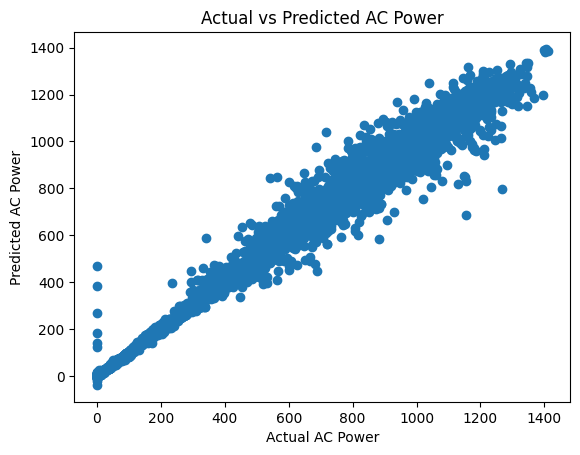

In [25]:
# Visualizing the differences between actual prices and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, forecast_prediction)
plt.xlabel("Actual AC Power")
plt.ylabel("Predicted AC Power")
plt.title("Actual vs Predicted AC Power")
plt.show()

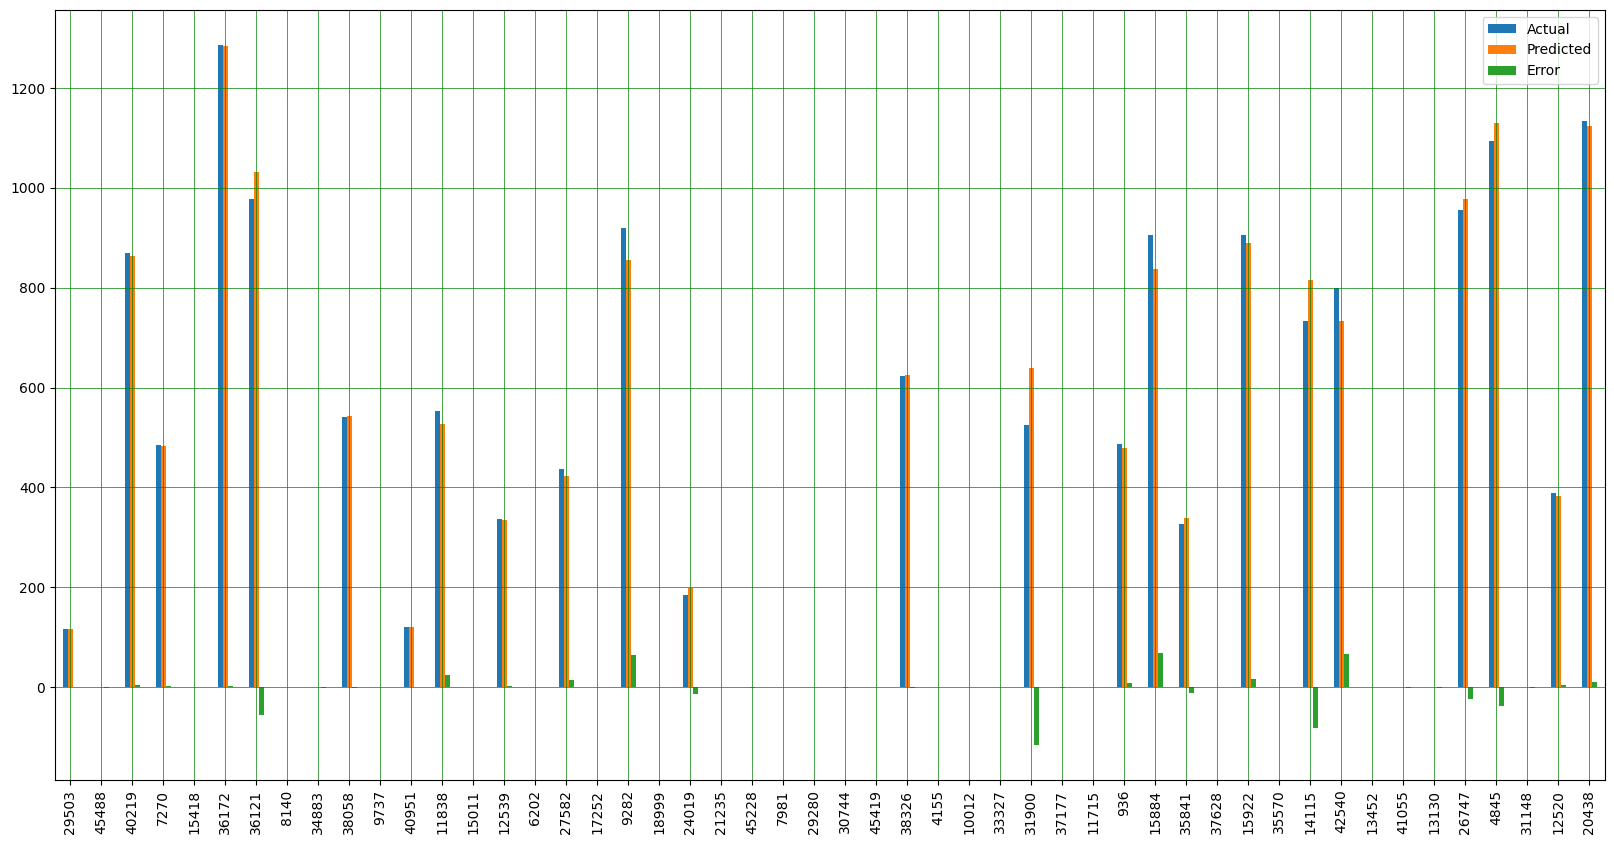

In [26]:
# Plot of a bar chart using DataFrame cross_check and the first 50 rows of data
d = cross_check.head(50)
d.plot(kind='bar', figsize=(20, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
# Test data for prediction
test_data = {'DAILY_YIELD': [9163], 'TOTAL_YIELD': [7846821.0], 'AMBIENT_TEMPERATURE': [35.25248613333334], 'IRRADIATION': [1.2216518466666668]}
test_data1 = pd.DataFrame(test_data)
newpred = best_model.predict(test_data1)
print(newpred)

[1307.1975]
